In [1]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def CalcularWPT(v1, rc,  r1, xl1, xm, r2, xl2, xc2, xc1):
    x_paralelo = 1/(1/xc2+1/rc)
    Z=np.array([[r1+xl1+xc1, -xm],[-xm, r2+xl2+x_paralelo]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1], x_paralelo

In [18]:
def ModelaProjeto(V1, Rc, r1, r2, L1, C1, k):
    
    L2 = L1
    C2 = C1
    corrente_I1 = []
    corrente_I2 = []
    potencia_1 = []
    potencia_2 = []
    lista_frequencia = range(int(20e3), int(50e3), 10)
    
    for frequencia in range(int(20e3), int(50e3), 10):
        w = 2 * pi * frequencia
        M = k*sqrt(L1*L2)
        xl1 = w * L1* 1j
        xl2 = w * L2* 1j
        xc1 = 1/(1j*w*C1)
        xc2 = 1/(1j*w*C2)
        xm = 1j * w * M


        I1, I2, r_paralelo = CalcularWPT(V1, Rc,  r1, xl1, xm, r2, xl2, xc2, xc1)
        
        V2 = r_paralelo * I2
        
        pot1 = V1*(np.conjugate(I1))/2
        pot2 = V2*(np.conjugate(I2))/2
        
        corrente_I1.append(abs(I1))
        corrente_I2.append(abs(I2))
        
        potencia_1.append(pot1.real)
        potencia_2.append(pot2.real)
    
    fig = plt.figure(figsize=(12,7))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    ax1.plot(lista_frequencia, corrente_I1)
    ax1.plot(lista_frequencia, corrente_I2)
    ax1.set_ylabel('Correntes')
    ax1.set_xlabel('Frequencia')
    ax1.set_title('Correntes vs Frequencia')
    
    ax2.plot(lista_frequencia, potencia_1)
    ax2.plot(lista_frequencia, potencia_2)
    ax2.set_ylabel('Potencias')
    ax2.set_xlabel('Frequencia')
    ax2.set_title('Potencias vs Frequencia')

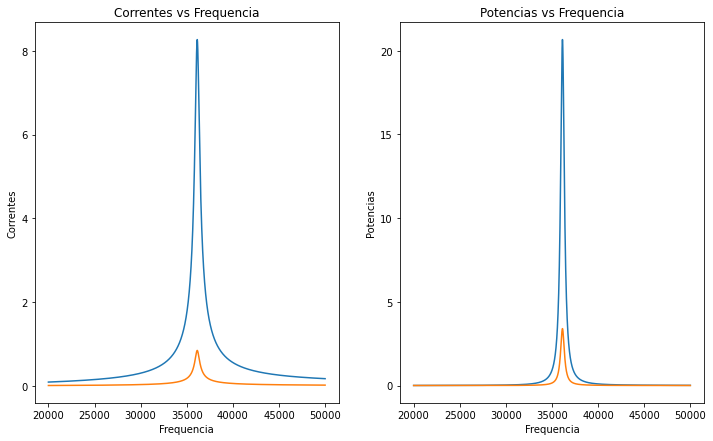

In [22]:
v1 = 5
rc = 10

ModelaProjeto(
    V1=v1,
    Rc=rc,
    r1=0.5,
    r2=0.5,
    L1=196e-6,
    C1=0.1e-6,
    k = 0.1
)

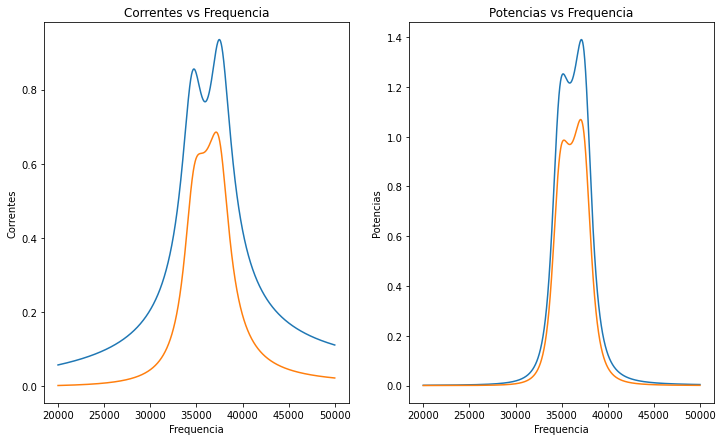

In [23]:
v1 = 10/pi
rc = 400

ModelaProjeto(
    V1=v1,
    Rc=rc,
    r1=0.5,
    r2=0.5,
    L1=196e-6,
    C1=0.1e-6,
    k = 0.1
)